In [1]:
#Importing Libraries
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd
import datetime 
import time
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.cluster import MiniBatchKMeans, KMeans
import math
import pickle
import os

import xgboost as xgb

import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

%matplotlib inline

In [2]:
#reading

from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [4]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9178827603264902 test Score 0.9077128102615359
Estimators =  50 Train Score 0.9235974062588103 test Score 0.9164386444958956
Estimators =  100 Train Score 0.9253924921815347 test Score 0.9182941747163286
Estimators =  250 Train Score 0.9238834707630488 test Score 0.9171692463413605
Estimators =  450 Train Score 0.9250952799765466 test Score 0.9181296421336934


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

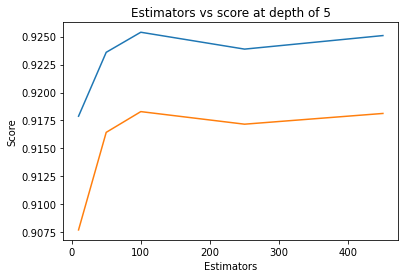

In [5]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

In [6]:
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [7]:
df_final_train.columns

y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [8]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9178827603264902 test Score 0.9077128102615359
Estimators =  50 Train Score 0.9235974062588103 test Score 0.9164386444958956
Estimators =  100 Train Score 0.9253924921815347 test Score 0.9182941747163286
Estimators =  250 Train Score 0.9238834707630488 test Score 0.9171692463413605
Estimators =  450 Train Score 0.9250952799765466 test Score 0.9181296421336934


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

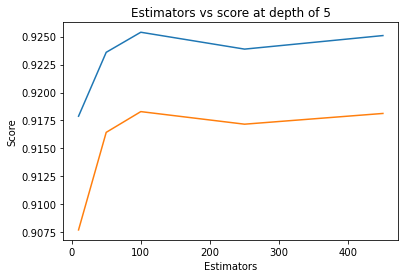

In [9]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8923372294189629 test Score 0.8698386714627263
depth =  9 Train Score 0.958784673656699 test Score 0.9232102837329272
depth =  11 Train Score 0.9615431745772404 test Score 0.9246865469332429
depth =  15 Train Score 0.9649541284403669 test Score 0.9247061315259981
depth =  20 Train Score 0.9652783437933001 test Score 0.922155434251609
depth =  35 Train Score 0.9655467492512378 test Score 0.9223711318310217
depth =  50 Train Score 0.9655467492512378 test Score 0.9223711318310217
depth =  70 Train Score 0.9655467492512378 test Score 0.9223711318310217
depth =  130 Train Score 0.9655467492512378 test Score 0.9223711318310217


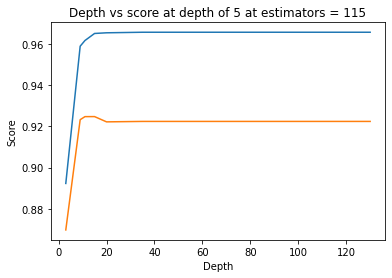

In [10]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [12]:
print(rf_random.best_estimator_)

RandomForestClassifier(max_depth=14, min_samples_leaf=28, min_samples_split=111,
                       n_estimators=121, n_jobs=-1, random_state=25)


In [13]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [14]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train f1 score 0.9659343120685794
Test f1 score 0.9259031937183856


Train confusion_matrix


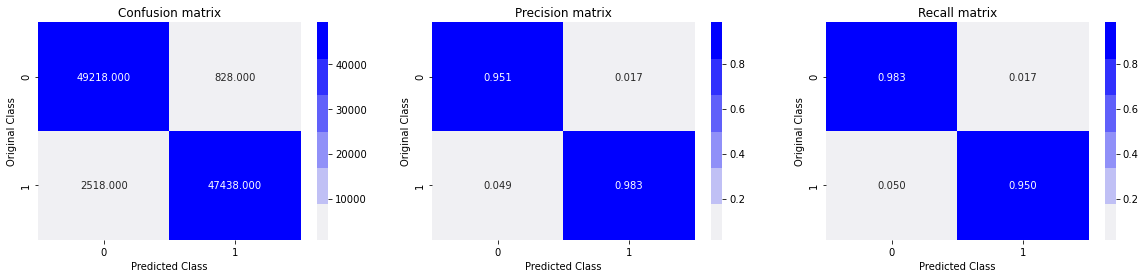

Test confusion_matrix


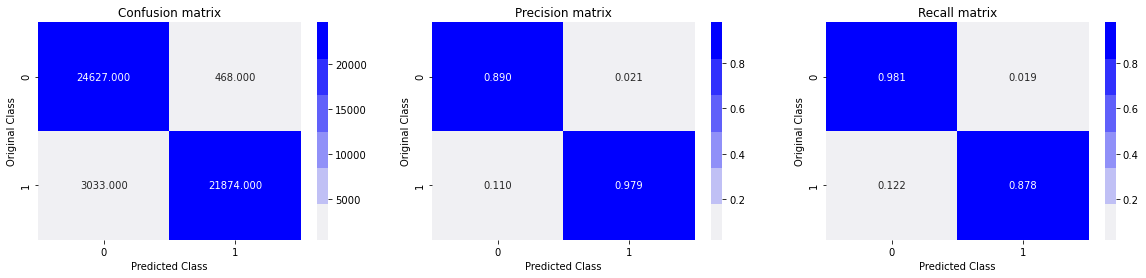

In [15]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

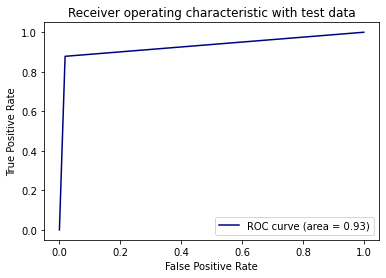

In [16]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

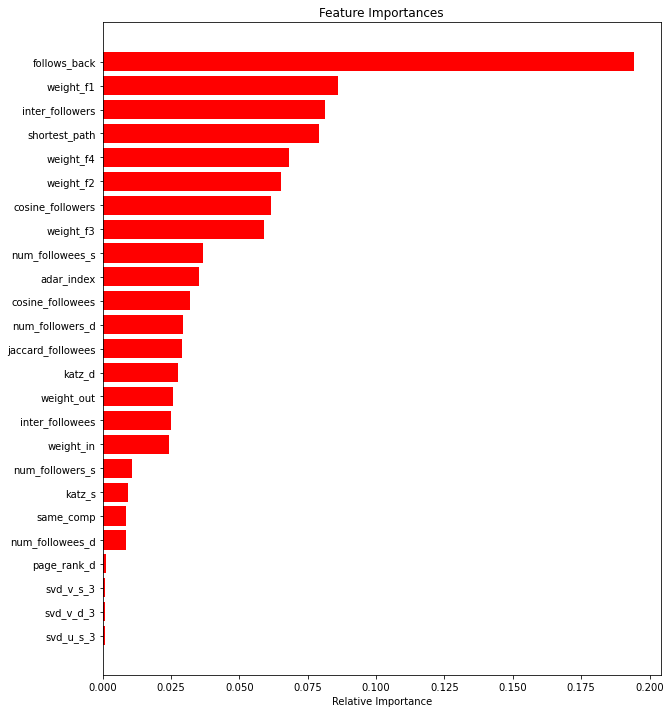

In [17]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0,0.000000,0.000000,0.000000,11,6,15,8,0,0,...,1.983706e-06,1.545080e-13,8.108343e-13,1.719702e-14,-1.355365e-12,4.675128e-13,1.128590e-06,6.616557e-14,9.771012e-13,4.159752e-14
1,0,0.000000,0.081650,0.000000,6,5,8,3,1,0,...,6.433868e-12,8.732960e-14,7.377978e-14,1.273774e-14,-5.730060e-13,5.369364e-12,9.793366e-12,1.921258e-14,1.808172e-14,7.772735e-17
2,0,0.015152,0.008873,0.029934,23,47,31,36,2,1,...,6.431519e-07,4.246525e-10,3.115989e-12,2.450627e-13,-1.956046e-11,2.752398e-12,2.370636e-05,1.931791e-11,1.307784e-09,4.712024e-13
3,0,0.052632,0.020000,0.140028,4,25,3,17,1,1,...,3.128810e-13,8.082579e-13,2.439390e-13,1.135870e-15,-3.344188e-12,5.280261e-10,4.502542e-11,1.613132e-12,4.272698e-11,3.007949e-14
4,0,0.000000,0.000000,0.000000,17,1,15,1,0,0,...,6.917882e-11,2.673924e-13,2.462267e-13,7.150228e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [19]:
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_3,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6
0,0,0.000000,0.029161,0.000000,6,14,6,9,1,0,...,5.904841e-11,2.701538e-12,4.341596e-13,5.535489e-14,-9.994075e-10,5.791911e-10,3.512365e-07,2.486660e-09,2.771128e-09,1.727695e-12
1,0,0.666667,0.183702,0.800641,12,11,12,13,7,10,...,9.619378e-20,-9.505510e-20,-3.324303e-21,2.946578e-20,-1.137515e-20,-4.038881e-20,9.192450e-20,-9.215822e-20,-2.140372e-21,2.502835e-20
2,0,0.029412,0.016444,0.171499,2,43,1,34,1,1,...,1.150357e-07,1.010563e-14,2.162870e-13,6.495233e-16,-3.199971e-11,2.727873e-11,2.320469e-05,7.568526e-12,2.552118e-11,6.775416e-13
3,0,0.033898,0.026082,0.071889,30,14,43,18,2,2,...,1.149181e-10,2.802928e-12,9.181620e-11,8.352678e-14,-1.358102e-12,1.425093e-09,2.959225e-11,1.217919e-12,2.077621e-09,3.516001e-14
4,0,0.071429,0.000000,0.166667,22,1,12,3,0,1,...,5.408861e-11,8.510876e-08,3.095122e-10,7.600904e-14,-9.457213e-17,7.448037e-17,8.263885e-15,5.420727e-14,5.343352e-17,2.441222e-20


In [20]:
train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
test_graph=nx.read_edgelist('data/after_eda/test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

In [21]:
from tqdm import tqdm
def compute_features_stage1(df,graph):
  num_followers_s =[]
  num_followees_s =[]
  num_followers_d =[]
  num_followees_d = []
  inter_followers= []
  inter_followees =[]
  for i,row in tqdm(df.iterrows()):
    try:
      s1 = set(graph.predecessors(row['source_node']))
      s2 = set(graph.successors(row['source_node']))
    except:
      s1 = set()
      s2 = set()
    try: 
      d1 = set(graph.predecessors(row["destination_node"]))
      d2 = set(graph.successors(row['destination_node']))
    except:
      d1 = set()
      d2 = set()
    num_followers_s.append(len(s1))
    num_followees_s.append(len(s2))
    num_followers_d.append(len(d1))
    num_followees_d.append(len(d2))

    inter_followees.append(len(s1.intersection(d1)))
    inter_followers.append(len(s2.intersection(d2)))

  return num_followers_d,num_followees_d,num_followers_s,num_followees_s,inter_followers,inter_followees

In [22]:
train_num_followers_d,train_num_followees_d,train_num_followers_s,train_num_followees_s,train_inter_followers,train_inter_followees = compute_features_stage1(df_final_train,train_graph)
test_num_followers_d,test_num_followees_d,test_num_followers_s,test_num_followees_s,test_inter_followers,test_inter_followees = compute_features_stage1(df_final_test,test_graph)

100002it [00:04, 20435.80it/s]
50002it [00:02, 20421.62it/s]


In [23]:
print (len(train_num_followers_d))
print (len(test_num_followers_d))

100002
50002


In [24]:
df_final_train["num_followers_d"] = train_num_followers_d
print (df_final_train.head())

df_final_test['num_followers_d'] = test_num_followees_d
print (df_final_test.head())

   jaccard_followers  jaccard_followees  cosine_followers  cosine_followees  \
0                  0           0.000000          0.000000          0.000000   
1                  0           0.000000          0.081650          0.000000   
2                  0           0.015152          0.008873          0.029934   
3                  0           0.052632          0.020000          0.140028   
4                  0           0.000000          0.000000          0.000000   

   num_followers_s  num_followers_d  num_followees_s  num_followees_d  \
0               11                0               15                8   
1                6                0                8                3   
2               23                0               31               36   
3                4                0                3               17   
4               17                0               15                1   

   inter_followers  inter_followees  ...     svd_v_s_3     svd_v_s_4  \
0             


# Preferential Attachments



## For followers


In [25]:
source = np.array(df_final_train["num_followers_s"])
destination = np.array(df_final_train["num_followers_d"])
followers_preferential = []
for i in range(len(source)):
  followers_preferential.append(source[i]*destination[i])
df_final_train["followers_preferential_attach"]  = followers_preferential 
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach
0,0,0.000000,0.000000,0.000000,11,0,15,8,0,0,...,1.545080e-13,8.108343e-13,1.719702e-14,-1.355365e-12,4.675128e-13,1.128590e-06,6.616557e-14,9.771012e-13,4.159752e-14,0
1,0,0.000000,0.081650,0.000000,6,0,8,3,1,0,...,8.732960e-14,7.377978e-14,1.273774e-14,-5.730060e-13,5.369364e-12,9.793366e-12,1.921258e-14,1.808172e-14,7.772735e-17,0
2,0,0.015152,0.008873,0.029934,23,0,31,36,2,1,...,4.246525e-10,3.115989e-12,2.450627e-13,-1.956046e-11,2.752398e-12,2.370636e-05,1.931791e-11,1.307784e-09,4.712024e-13,0
3,0,0.052632,0.020000,0.140028,4,0,3,17,1,1,...,8.082579e-13,2.439390e-13,1.135870e-15,-3.344188e-12,5.280261e-10,4.502542e-11,1.613132e-12,4.272698e-11,3.007949e-14,0
4,0,0.000000,0.000000,0.000000,17,0,15,1,0,0,...,2.673924e-13,2.462267e-13,7.150228e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0


In [26]:
source = np.array(df_final_train["num_followees_s"])
destination = np.array(df_final_train["num_followees_s"])
followees_preferential = []
for i in range(len(source)):
  followees_preferential.append(source[i]*destination[i])
df_final_train["followees_preferential_attach"]  = followees_preferential 
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach
0,0,0.000000,0.000000,0.000000,11,0,15,8,0,0,...,8.108343e-13,1.719702e-14,-1.355365e-12,4.675128e-13,1.128590e-06,6.616557e-14,9.771012e-13,4.159752e-14,0,225
1,0,0.000000,0.081650,0.000000,6,0,8,3,1,0,...,7.377978e-14,1.273774e-14,-5.730060e-13,5.369364e-12,9.793366e-12,1.921258e-14,1.808172e-14,7.772735e-17,0,64
2,0,0.015152,0.008873,0.029934,23,0,31,36,2,1,...,3.115989e-12,2.450627e-13,-1.956046e-11,2.752398e-12,2.370636e-05,1.931791e-11,1.307784e-09,4.712024e-13,0,961
3,0,0.052632,0.020000,0.140028,4,0,3,17,1,1,...,2.439390e-13,1.135870e-15,-3.344188e-12,5.280261e-10,4.502542e-11,1.613132e-12,4.272698e-11,3.007949e-14,0,9
4,0,0.000000,0.000000,0.000000,17,0,15,1,0,0,...,2.462267e-13,7.150228e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,225


In [27]:
source = np.array(df_final_test["num_followers_s"])
destination = np.array(df_final_test["num_followers_d"])
followers_preferential = []
for i in range(len(source)):
  followers_preferential.append(source[i]*destination[i])
df_final_test["followers_preferential_attach"]  = followers_preferential 
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_4,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach
0,0,0.000000,0.029161,0.000000,6,0,6,9,1,0,...,2.701538e-12,4.341596e-13,5.535489e-14,-9.994075e-10,5.791911e-10,3.512365e-07,2.486660e-09,2.771128e-09,1.727695e-12,0
1,0,0.666667,0.183702,0.800641,12,0,12,13,7,10,...,-9.505510e-20,-3.324303e-21,2.946578e-20,-1.137515e-20,-4.038881e-20,9.192450e-20,-9.215822e-20,-2.140372e-21,2.502835e-20,0
2,0,0.029412,0.016444,0.171499,2,0,1,34,1,1,...,1.010563e-14,2.162870e-13,6.495233e-16,-3.199971e-11,2.727873e-11,2.320469e-05,7.568526e-12,2.552118e-11,6.775416e-13,0
3,0,0.033898,0.026082,0.071889,30,0,43,18,2,2,...,2.802928e-12,9.181620e-11,8.352678e-14,-1.358102e-12,1.425093e-09,2.959225e-11,1.217919e-12,2.077621e-09,3.516001e-14,0
4,0,0.071429,0.000000,0.166667,22,0,12,3,0,1,...,8.510876e-08,3.095122e-10,7.600904e-14,-9.457213e-17,7.448037e-17,8.263885e-15,5.420727e-14,5.343352e-17,2.441222e-20,0


In [28]:
source = np.array(df_final_test["num_followees_s"])
destination = np.array(df_final_test["num_followees_s"])
followees_preferential = []
for i in range(len(source)):
  followees_preferential.append(source[i]*destination[i])
df_final_test["followees_preferential_attach"]  = followees_preferential 
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_5,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach
0,0,0.000000,0.029161,0.000000,6,0,6,9,1,0,...,4.341596e-13,5.535489e-14,-9.994075e-10,5.791911e-10,3.512365e-07,2.486660e-09,2.771128e-09,1.727695e-12,0,36
1,0,0.666667,0.183702,0.800641,12,0,12,13,7,10,...,-3.324303e-21,2.946578e-20,-1.137515e-20,-4.038881e-20,9.192450e-20,-9.215822e-20,-2.140372e-21,2.502835e-20,0,144
2,0,0.029412,0.016444,0.171499,2,0,1,34,1,1,...,2.162870e-13,6.495233e-16,-3.199971e-11,2.727873e-11,2.320469e-05,7.568526e-12,2.552118e-11,6.775416e-13,0,1
3,0,0.033898,0.026082,0.071889,30,0,43,18,2,2,...,9.181620e-11,8.352678e-14,-1.358102e-12,1.425093e-09,2.959225e-11,1.217919e-12,2.077621e-09,3.516001e-14,0,1849
4,0,0.071429,0.000000,0.166667,22,0,12,3,0,1,...,3.095122e-10,7.600904e-14,-9.457213e-17,7.448037e-17,8.263885e-15,5.420727e-14,5.343352e-17,2.441222e-20,0,144



## Adding SV_DOT feature


In [29]:
sorted(df_final_train.columns)

['adar_index',
 'authorities_d',
 'authorities_s',
 'cosine_followees',
 'cosine_followers',
 'followees_preferential_attach',
 'followers_preferential_attach',
 'follows_back',
 'hubs_d',
 'hubs_s',
 'inter_followees',
 'inter_followers',
 'jaccard_followees',
 'jaccard_followers',
 'katz_d',
 'katz_s',
 'num_followees_d',
 'num_followees_s',
 'num_followers_d',
 'num_followers_s',
 'page_rank_d',
 'page_rank_s',
 'same_comp',
 'shortest_path',
 'svd_u_d_1',
 'svd_u_d_2',
 'svd_u_d_3',
 'svd_u_d_4',
 'svd_u_d_5',
 'svd_u_d_6',
 'svd_u_s_1',
 'svd_u_s_2',
 'svd_u_s_3',
 'svd_u_s_4',
 'svd_u_s_5',
 'svd_u_s_6',
 'svd_v_d_1',
 'svd_v_d_2',
 'svd_v_d_3',
 'svd_v_d_4',
 'svd_v_d_5',
 'svd_v_d_6',
 'svd_v_s_1',
 'svd_v_s_2',
 'svd_v_s_3',
 'svd_v_s_4',
 'svd_v_s_5',
 'svd_v_s_6',
 'weight_f1',
 'weight_f2',
 'weight_f3',
 'weight_f4',
 'weight_in',
 'weight_out']

In [30]:
svd_dot_U =[]
range_value = len(np.array(df_final_train["svd_u_d_1"]))
for i in range(range_value):
  u_s = []
  u_d = []
  u_s.append(np.array(df_final_train["svd_u_s_1"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_2"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_3"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_4"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_5"][i]))
  u_s.append(np.array(df_final_train["svd_u_s_6"][i]))

  u_d.append(np.array(df_final_train["svd_u_d_1"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_2"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_3"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_4"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_5"][i]))
  u_d.append(np.array(df_final_train["svd_u_d_6"][i]))

  svd_dot_U.append(np.dot(u_s,u_d))

In [31]:
df_final_train["svd_dot_U"] = svd_dot_U
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U
0,0,0.000000,0.000000,0.000000,11,0,15,8,0,0,...,1.719702e-14,-1.355365e-12,4.675128e-13,1.128590e-06,6.616557e-14,9.771012e-13,4.159752e-14,0,225,1.114946e-11
1,0,0.000000,0.081650,0.000000,6,0,8,3,1,0,...,1.273774e-14,-5.730060e-13,5.369364e-12,9.793366e-12,1.921258e-14,1.808172e-14,7.772735e-17,0,64,4.778509e-23
2,0,0.015152,0.008873,0.029934,23,0,31,36,2,1,...,2.450627e-13,-1.956046e-11,2.752398e-12,2.370636e-05,1.931791e-11,1.307784e-09,4.712024e-13,0,961,4.518481e-12
3,0,0.052632,0.020000,0.140028,4,0,3,17,1,1,...,1.135870e-15,-3.344188e-12,5.280261e-10,4.502542e-11,1.613132e-12,4.272698e-11,3.007949e-14,0,9,2.370729e-22
4,0,0.000000,0.000000,0.000000,17,0,15,1,0,0,...,7.150228e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,225,4.085360e-24


In [32]:
svd_dot_V = []
range_value = len(np.array(df_final_train["svd_v_d_1"]))
for i in range(range_value):
  v_s = []
  v_d = []
  v_s.append(np.array(df_final_train["svd_v_s_1"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_2"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_3"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_4"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_5"][i]))
  v_s.append(np.array(df_final_train["svd_v_s_6"][i]))

  v_d.append(np.array(df_final_train["svd_v_d_1"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_2"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_3"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_4"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_5"][i]))
  v_d.append(np.array(df_final_train["svd_v_d_6"][i]))

  svd_dot_V.append(np.dot(v_s,v_d))

In [33]:
df_final_train["svd_dot_V"] = svd_dot_V
df_final_train.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U,svd_dot_V
0,0,0.000000,0.000000,0.000000,11,0,15,8,0,0,...,-1.355365e-12,4.675128e-13,1.128590e-06,6.616557e-14,9.771012e-13,4.159752e-14,0,225,1.114946e-11,2.238789e-12
1,0,0.000000,0.081650,0.000000,6,0,8,3,1,0,...,-5.730060e-13,5.369364e-12,9.793366e-12,1.921258e-14,1.808172e-14,7.772735e-17,0,64,4.778509e-23,6.469919e-23
2,0,0.015152,0.008873,0.029934,23,0,31,36,2,1,...,-1.956046e-11,2.752398e-12,2.370636e-05,1.931791e-11,1.307784e-09,4.712024e-13,0,961,4.518481e-12,1.524679e-11
3,0,0.052632,0.020000,0.140028,4,0,3,17,1,1,...,-3.344188e-12,5.280261e-10,4.502542e-11,1.613132e-12,4.272698e-11,3.007949e-14,0,9,2.370729e-22,2.120657e-21
4,0,0.000000,0.000000,0.000000,17,0,15,1,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,225,4.085360e-24,0.000000e+00


In [34]:
svd_dot_U =[]
range_value = len(np.array(df_final_test["svd_u_d_1"]))
for i in range(range_value):
  u_s = []
  u_d = []
  u_s.append(np.array(df_final_test["svd_u_s_1"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_2"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_3"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_4"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_5"][i]))
  u_s.append(np.array(df_final_test["svd_u_s_6"][i]))

  u_d.append(np.array(df_final_test["svd_u_d_1"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_2"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_3"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_4"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_5"][i]))
  u_d.append(np.array(df_final_test["svd_u_d_6"][i]))

  svd_dot_U.append(np.dot(u_s,u_d))

In [35]:
df_final_test["svd_dot_U"] = svd_dot_U
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_s_6,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U
0,0,0.000000,0.029161,0.000000,6,0,6,9,1,0,...,5.535489e-14,-9.994075e-10,5.791911e-10,3.512365e-07,2.486660e-09,2.771128e-09,1.727695e-12,0,36,8.425221e-20
1,0,0.666667,0.183702,0.800641,12,0,12,13,7,10,...,2.946578e-20,-1.137515e-20,-4.038881e-20,9.192450e-20,-9.215822e-20,-2.140372e-21,2.502835e-20,0,144,1.925254e-36
2,0,0.029412,0.016444,0.171499,2,0,1,34,1,1,...,6.495233e-16,-3.199971e-11,2.727873e-11,2.320469e-05,7.568526e-12,2.552118e-11,6.775416e-13,0,1,1.253871e-12
3,0,0.033898,0.026082,0.071889,30,0,43,18,2,2,...,8.352678e-14,-1.358102e-12,1.425093e-09,2.959225e-11,1.217919e-12,2.077621e-09,3.516001e-14,0,1849,1.159865e-18
4,0,0.071429,0.000000,0.166667,22,0,12,3,0,1,...,7.600904e-14,-9.457213e-17,7.448037e-17,8.263885e-15,5.420727e-14,5.343352e-17,2.441222e-20,0,144,7.934600e-18


In [36]:
svd_dot_V = []
range_value = len(np.array(df_final_test["svd_v_d_1"]))
for i in range(range_value):
  v_s = []
  v_d = []
  v_s.append(np.array(df_final_test["svd_v_s_1"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_2"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_3"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_4"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_5"][i]))
  v_s.append(np.array(df_final_test["svd_v_s_6"][i]))

  v_d.append(np.array(df_final_test["svd_v_d_1"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_2"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_3"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_4"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_5"][i]))
  v_d.append(np.array(df_final_test["svd_v_d_6"][i]))

  svd_dot_V.append(np.dot(v_s,v_d))

In [37]:
df_final_test["svd_dot_V"] = svd_dot_V
df_final_test.head()

,jaccard_followers,jaccard_followees,cosine_followers,cosine_followees,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,...,svd_v_d_1,svd_v_d_2,svd_v_d_3,svd_v_d_4,svd_v_d_5,svd_v_d_6,followers_preferential_attach,followees_preferential_attach,svd_dot_U,svd_dot_V
0,0,0.000000,0.029161,0.000000,6,0,6,9,1,0,...,-9.994075e-10,5.791911e-10,3.512365e-07,2.486660e-09,2.771128e-09,1.727695e-12,0,36,8.425221e-20,2.074820e-17
1,0,0.666667,0.183702,0.800641,12,0,12,13,7,10,...,-1.137515e-20,-4.038881e-20,9.192450e-20,-9.215822e-20,-2.140372e-21,2.502835e-20,0,144,1.925254e-36,2.024999e-38
2,0,0.029412,0.016444,0.171499,2,0,1,34,1,1,...,-3.199971e-11,2.727873e-11,2.320469e-05,7.568526e-12,2.552118e-11,6.775416e-13,0,1,1.253871e-12,2.669368e-12
3,0,0.033898,0.026082,0.071889,30,0,43,18,2,2,...,-1.358102e-12,1.425093e-09,2.959225e-11,1.217919e-12,2.077621e-09,3.516001e-14,0,1849,1.159865e-18,2.213764e-19
4,0,0.071429,0.000000,0.166667,22,0,12,3,0,1,...,-9.457213e-17,7.448037e-17,8.263885e-15,5.420727e-14,5.343352e-17,2.441222e-20,0,144,7.934600e-18,4.613977e-21



# Training


In [38]:
x_train  =  df_final_train
x_test = df_final_test

In [39]:
x_train.shape

(100002, 56)

In [40]:
y_train.shape

(100002,)

In [41]:
x_test.shape

(50002, 56)

In [42]:
y_test.shape

(50002,)

In [43]:
# Import required packages

from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV

In [44]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = [0,1]
    cmap=sns.light_palette("green")
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))

    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(5,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

In [45]:
params = {
        'min_child_weight': [1, 5, 10],
        'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' :[100,200,500,1000,2000],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
          }
xgboost = XGBClassifier()          
random_cfl1=RandomizedSearchCV(xgboost,param_distributions = params,verbose=10,n_jobs=-1)
random_cfl1.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[22:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_param

In [46]:
print(random_cfl1.best_params_)

{'subsample': 0.6, 'n_estimators': 2000, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.5, 'colsample_bytree': 0.6}


In [47]:
from sklearn.calibration import CalibratedClassifierCV
best_xgb = XGBClassifier(sub_sample=0.8,learning_rate = 0.2,colsample_bytree=0.6,max_depth=5,n_estimators=1000,min_child_weight=5,gamma=5)
best_xgb.fit(x_train,y_train)
clf = CalibratedClassifierCV(best_xgb,method="sigmoid")
clf.fit(x_train,y_train)

[22:05:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "sub_sample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:07:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "sub_sample" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not u

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=0.6,
                                                    gamma=5, gpu_id=-1,
                                                    importance_type='gain',
                                                    interaction_constraints='',
                                                    learning_rate=0.2,
                                                    max_delta_step=0,
                                                    max_depth=5,
                                                    min_child_weight=5,
                                                    missing=nan,
                                                    monotone_constraints

the train log loss is 0.023456571382297436
the test log loss is 0.32847383568601185
Number of misclassified points  8.26166953321867
-------------------------------------------------- Confusion matrix --------------------------------------------------


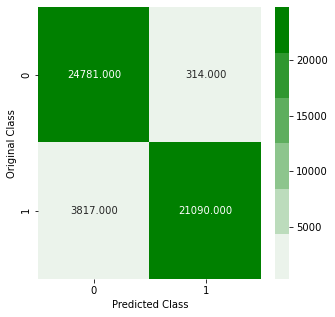

-------------------------------------------------- Precision matrix --------------------------------------------------


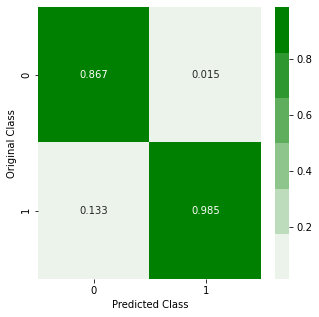

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


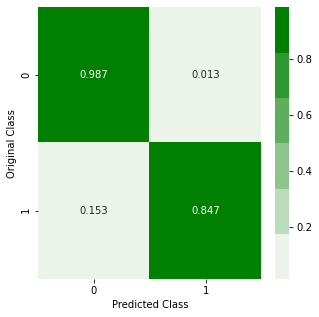

Sum of rows in precision matrix [1. 1.]


In [48]:
from sklearn.metrics import log_loss
predict_y = clf.predict_proba(x_train)
print("the train log loss is",log_loss(y_train,predict_y,labels=best_xgb.classes_))
predict_y = clf.predict_proba(x_test)
print("the test log loss is",log_loss(y_test,predict_y,labels = best_xgb.classes_))
plot_confusion_matrix(y_test,clf.predict(x_test))

In [49]:
from sklearn.metrics import f1_score
print("f1 score for train data",f1_score(y_train,clf.predict(x_train)))
print("f1 score for test data",f1_score(y_test,clf.predict(x_test)))

f1 score for train data 0.9927216585796206
f1 score for test data 0.9107987303232494


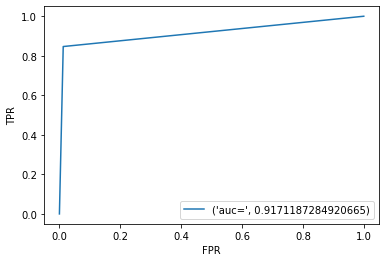

In [50]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,clf.predict(x_test))
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr,label = ('auc=',auc_sc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

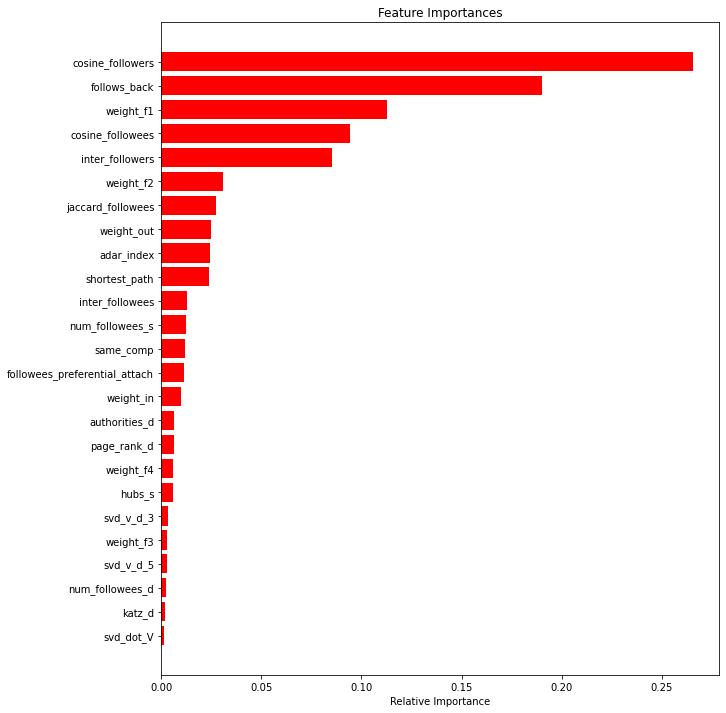

In [51]:
features = df_final_train.columns
importances = best_xgb.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# CONCLUSION

In [54]:
!pip install prettytable
import prettytable
from prettytable import PrettyTable
t = PrettyTable()
t.field_names=["model","train_f1_Score","test_f1_score"]
t.add_row(["XGBoost","0.9920553921274338","0.9124241511382708"])
print(t)

+---------+--------------------+--------------------+
|  model  |   train_f1_Score   |   test_f1_score    |
+---------+--------------------+--------------------+
| XGBoost | 0.9920553921274338 | 0.9124241511382708 |
+---------+--------------------+--------------------+
